In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [41]:
dataSet , dataset_info = tfds.load('malaria' , with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [42]:
for data in dataSet[0].take(1):
    print(data)


(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [10]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/tmp9jj6dkuttfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria para

In [11]:
dataSet

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [27]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

dataSet = tf.data.Dataset.range(10)
print(list(dataSet.as_numpy_iterator()))
dataset_size = (len(dataSet))

train_dataset = dataSet.take(int(TRAIN_RATIO*dataset_size))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataSet.skip(int(TRAIN_RATIO*dataset_size))
val_dataset = val_test_dataset.take(int(VAL_RATIO*dataset_size))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = val_test_dataset.skip(int(TEST_RATIO*dataset_size))
print(list(test_dataset.as_numpy_iterator()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


In [50]:
def splits(dataSet,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    dataset_size = (len(dataSet))
    train_dataset = dataSet.take(int(TRAIN_RATIO*dataset_size))
 

    val_test_dataset = dataSet.skip(int(TRAIN_RATIO*dataset_size))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*dataset_size))
 

    test_dataset = val_test_dataset.skip(int(TEST_RATIO*dataset_size))
    return train_dataset, val_dataset, test_dataset


In [65]:
train, val, test = splits(dataSet[0],0.8, 0.1,0.1)


## DATA VISUALIZATION

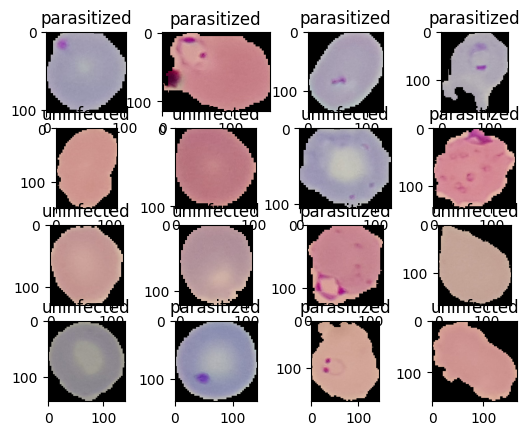

In [66]:
for i, (img, label) in enumerate(train.take(16)):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(img)
    plt.title(dataset_info.features['label'].int2str(label))

## Data Processing 

In [78]:
IM_SIZE = 224
def resizing_rescale(image, label):
    return tf.image.resize(image, [IM_SIZE, IM_SIZE]) / 225.0, label


In [79]:
train = train.map(resizing)

In [80]:
for img, label in train.take(1):

    print(img, label)


tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [81]:
# shuffling Data
train = train.shuffle(buffer_size=8 , reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)